In [1]:
import csv
import math
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(path: str) -> List[list]:
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        return [row for row in reader]

In [3]:
def draw_radar(
    data: List[list],
    ylim: Tuple[float, float] = None,
    fill: bool = True,
    save_path: str = 'radar.pdf'
):
    """Draw a radar chart from the given data.

    Note:
        The data should be a list of lists, where the first row is the header,
        and the first column is the label. Missing values are allowed.

    Example:
        ```
        data = [
            ['', 'header1', 'header2', 'header3'],
            ['dimension1', 1, 2, 3],
            ['dimension2', 4, '', 6],
            ['dimension3', 7, 8, 9],
        ]
        ```

    Args:
        data (List[list]): The data to draw.
        ylim (Tuple[float, float], optional): The y-axis limit. Defaults to None.
        fill (bool, optional): Whether to fill the area. Defaults to True.
        save_path (str, optional): The path to save the figure. Defaults to 'radar.pdf'.
    """
    plt.style.use('ggplot')
    plt.figure(figsize=(7, 5), dpi=300)

    header = data[0][1:]  # Exclude the first column, which is the label
    content = data[1:]
    N = len(header)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles = [*angles, angles[0]]  # To close the plot

    for row in content:
        label = row[0]
        real_angles, real_data = [], []
        for angle, data_point in zip(angles, row[1:]+[row[1]]):
            if data_point == '':
                continue
            real_angles.append(angle)
            real_data.append(float(data_point))

        plt.polar(real_angles, real_data, 'o-', label=label)
        plt.fill(real_angles, real_data, alpha=0.2) if fill else ...

    plt.thetagrids([angle*180/math.pi for angle in angles], [*header, header[1]])
    plt.ylim(*ylim) if ylim is not None else ...
    plt.legend(loc = (1.05,0))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)

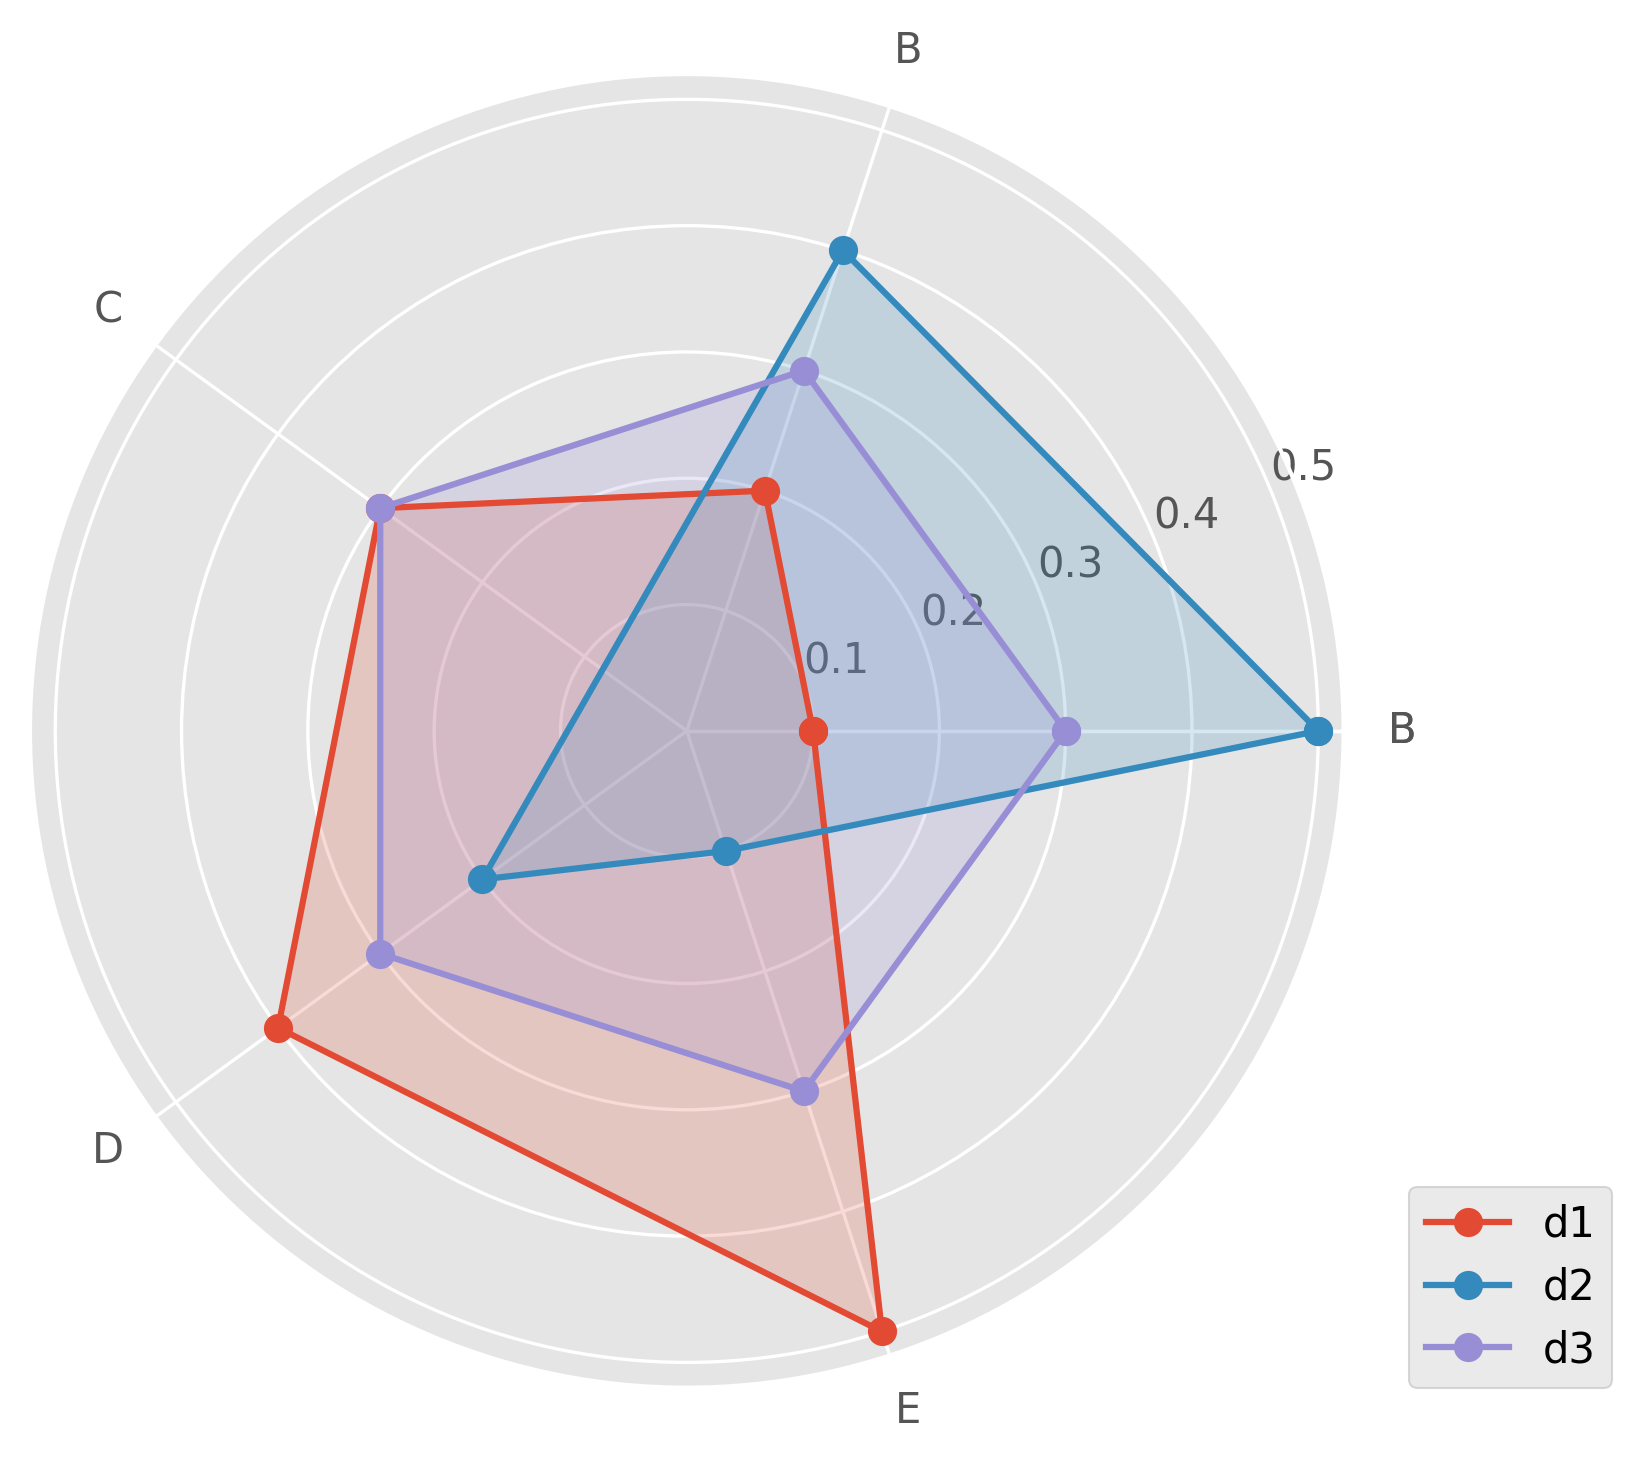

In [4]:
data = read_csv('data.csv')
draw_radar(data)